<a href="https://colab.research.google.com/github/NadiaaOliverr/Palestra-analise-exploratoria-de-dados/blob/main/explorando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#021017">📊 Análise exploratória de dados com Python</span>

Conteúdo prático da palestra que lecionei sobre **Análise Exploratória de Dados (EDA)**, ministrada no **IFMG Campus Ouro Branco**. O objetivo da palestra foi introduzir conceitos da análise exploratória, apresentando ferramentas  e exemplos de código para entender melhor os dados usando bibliotecas como **Pandas** e **Matplotlib**.

- [Documentação oficial do Pandas](https://pandas.pydata.org/)
- [Documentação oficial do Matplotlib](https://matplotlib.org/)

## Importação das bibliotecas

O apelido `pd` refere-se à biblioteca Pandas, que é utilizada para manipulação e análise de dados. Já o `plt` é um apelido para o módulo `pyplot` da biblioteca Matplotlib, responsável pela criação de gráficos e visualizações. Esses apelidos são convenções comuns usadas pela maioria das pessoas desenvolvedoras da área.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Realizando a leitura dos dados

Utilizamos o comando `pd.read_csv()` para ler o arquivo, especificando o separador como uma vírgula (sep=','), que é o padrão para arquivos CSV, mas, poderia ser outros como tabulação, espaço ou ponto e vírgula.

O nome `df` é uma abreviação de DataFrame, a estrutura de dados principal do Pandas, que vem da ideia de dados tabulares organizados em formato semelhante a uma tabela, na estrutura de linhas e colunas.

In [2]:
url_dos_dados = 'https://raw.githubusercontent.com/NadiaaOliverr/Palestra-analise-exploratoria-de-dados/refs/heads/main/geladeira.csv'
df = pd.read_csv(url_dos_dados, sep=',')

## Explorando a estrutura dos dados

O comando `head` exibe as primeiras linhas dos dados, ajudando a visualizar as colunas e as primeiras amostras. Caso o argumento `n` não seja especificado, o padrão é exibir as 5 primeiras linhas.

In [12]:
df

,Marca,Preço (R$),Capacidade (L),Eficiência
0,Brastemp,3500,400,A
1,Consul,2800,350,C
2,Electrolux,3200,450,B
3,Samsung,3100,380,A
4,LG,2700,360,B


In [4]:
df.head(n=2)

,Marca,Preço (R$),Capacidade (L),Eficiência,Unnamed: 4
0,Brastemp Loja 4,3500,400,A,NaN
1,Consul Loja 1,2800,350,C,NaN


O comando `info` exibe um resumo geral sobre o DataFrame, incluindo:

- O número total de entradas (linhas);
- O número de colunas e seus respectivos nomes;
- O tipo de dado de cada coluna (ex.: int64, float64, object);
- A quantidade de valores não nulos em cada coluna.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           6 non-null      object 
 1   Preço (R$)      6 non-null      int64  
 2   Capacidade (L)  6 non-null      int64  
 3   Eficiência      6 non-null      object 
 4   Unnamed: 4      1 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 372.0+ bytes


O comando `df.isna().sum()` retorna a quantidade de valores ausentes (*NaN*) em cada coluna do DataFrame.  

- O método `isna()` identifica as posições onde há valores ausentes, marcando-os como `True`.  
- O método `sum()` contabiliza esses valores, exibindo o total de ausências por coluna.

In [6]:
df.isna().sum()

,0
Marca,0
Preço (R$),0
Capacidade (L),0
Eficiência,0
Unnamed: 4,5


## Tratamento de dados

O comando `df = df.drop(columns=['Unnamed: 4'])` remove a coluna chamada `Unnamed: 4` do DataFrame, que neste caso é irrelevantes para a análise.  

In [7]:
df = df.drop(columns=['Unnamed: 4'])

O comando `df = df.drop(df.index[-1])` remove a última linha do DataFrame utilizando indexação negativa. No Python, o índice `-1` representa o último elemento de uma sequência, o -2 o antepenúltimo e assim por diante.

In [8]:
df = df.drop(df.index[-1])

O comando `df['Marca'] = df['Marca'].str.split(' Loja').str[0]` separa os valores da coluna `Marca` pelo termo `" Loja"` e mantém apenas a parte anterior à divisão.  Essa operação utiliza o método `str.split()`, que retorna uma lista, e o índice `[0]` acessa o primeiro elemento, removendo o texto após `" Loja"`.  

In [9]:
df['Marca'] = df['Marca'].str.split(' Loja').str[0]

In [11]:
df.head()

,Marca,Preço (R$),Capacidade (L),Eficiência
0,Brastemp,3500,400,A
1,Consul,2800,350,C
2,Electrolux,3200,450,B
3,Samsung,3100,380,A
4,LG,2700,360,B


## Estatísticas simples

- `mean()`: Calcula a média dos valores na coluna `Preço (R$)`.  
- `median()`: Calcula a mediana, que representa o valor central dos dados ordenados.

In [13]:
print(f"Média de preço: R$ {df['Preço (R$)'].mean():.2f}")
print(f"Mediana do preço: R$ {df['Preço (R$)'].median():.2f}")

Média de preço: R$ 3060.00
Mediana do preço: R$ 3100.00


## Visualização

Podemos começar explorando um gráfico de barras para comparar o preço das geladeiras entre diferentes marcas e exibir a capacidade acima de cada barra.Ordenamos os dados pelo preço para facilitar a análise. As legendas foram posicionadas para destacar a capacidade de cada modelo.  


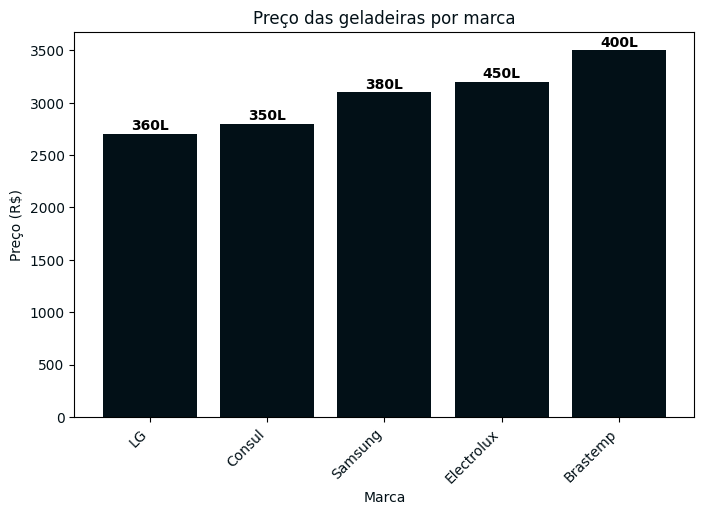

In [28]:
df_sorted = df.sort_values(by='Preço (R$)', ascending=True)

marcas = df_sorted['Marca']
precos = df_sorted['Preço (R$)']
capacidade = df_sorted['Capacidade (L)']

plt.figure(figsize=(8, 5))
barras = plt.bar(marcas, precos, color='#021017')

for i, bar in enumerate(barras):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 10,
             f'{capacidade.iloc[i]}L',
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title("Preço das geladeiras por marca", color='#021017')
plt.xlabel("Marca", color='#021017')
plt.ylabel("Preço (R$)", color='#021017')

plt.xticks(rotation=45, ha="right", color='#021017')
plt.yticks(color='#021017')

plt.show()

Nem sempre um único gráfico é suficiente para responder às nossas perguntas. Parte do nosso trabalho é explorar a melhor visualização para os dados.  Por exemplo, quando lidamos com dados que possuem uma relação temporal, como dias, meses ou anos, o gráfico de linha geralmente é a melhor escolha.  

Já no caso deste conjunto, em que temos três variáveis simultâneas — capacidade, preço e eficiência —, um gráfico de bolhas se mostra mais adequado.  

Nesse gráfico, o tamanho das bolhas representa a eficiência, enquanto os eixos X e Y exibem a capacidade e o preço, respectivamente.  
Assim, conseguimos visualizar de forma clara a relação entre essas três variáveis e identificar padrões que influeciam na tomada de decisão.

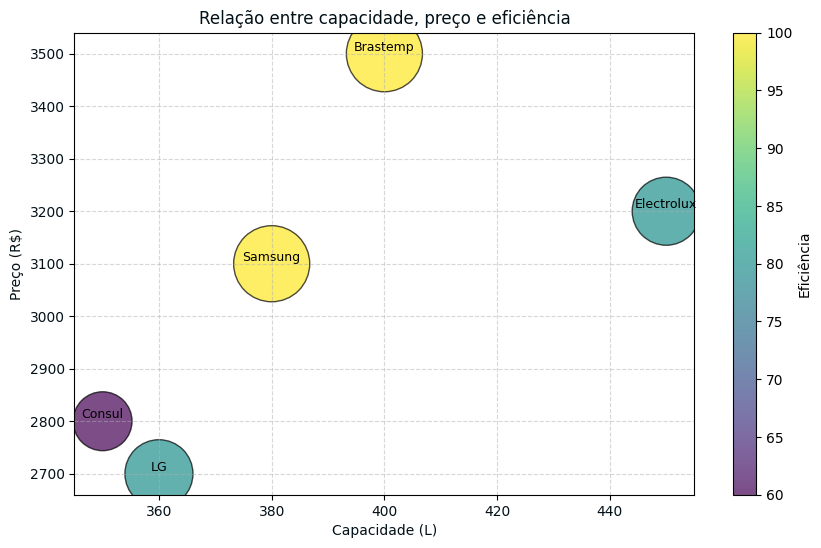

In [40]:
eficiencia_map = {'A': 100, 'B': 80, 'C': 60, 'D': 40, 'E': 20}
df['Eficiência Numérica'] = df['Eficiência'].map(eficiencia_map)

df_sorted = df.sort_values(by='Preço (R$)', ascending=True)

marcas = df_sorted['Marca']
capacidade = df_sorted['Capacidade (L)']
precos = df_sorted['Preço (R$)']
eficiencia = df_sorted['Eficiência Numérica']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(capacidade, precos,
                      s=eficiencia * 30,
                      c=eficiencia, cmap='viridis', alpha=0.7, edgecolor='k')

for i, marca in enumerate(marcas):
    plt.text(capacidade.iloc[i], precos.iloc[i], marca, ha='center', va='bottom', fontsize=9)

plt.colorbar(scatter, label='Eficiência')
plt.title('Relação entre capacidade, preço e eficiência', color='#021017')
plt.xlabel('Capacidade (L)', color='#021017')
plt.ylabel('Preço (R$)', color='#021017')

plt.xticks(color='#021017')
plt.yticks(color='#021017')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Conclusão

A análise exploratória de dados não é um processo aleatório, mas uma jornada de descoberta.  Os dados brutos são lapidados, transformados e analisados, revelando padrões e informações que embasam decisões. O que mostrei aqui foi apenas um exemplo simples, mas essa lógica se aplica a qualquer base de dados, independentemente do tamanho ou complexidade.  

Obrigada por acompanhar até aqui!